In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
data = pd.read_csv("./data/nyt7.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,0,0,3,0,0
1,46,1,3,0,1
2,0,0,6,1,0
3,22,0,4,0,1
4,0,0,2,0,0
...,...,...,...,...,...
452488,44,0,5,0,1
452489,47,1,3,0,1
452490,63,0,9,0,1
452491,30,0,5,0,1


In [3]:
data.Age.unique()

array([  0,  46,  22,  18,  35,  41,  72,  26,  57,  65,  51,  63,  31,
        19,  48,  58,  42,  37,  36,  15,  45,  75,  14,  56,  53,  61,
        50,  60,  28,  73,  16,  33,  30,  47,  34,  39,  17,  43,  52,
        54,  23,  76,  74,  40,  38,  59,  55,  20,  27,  24,  64,  44,
        29,  81,  32,  25,  62,  69,  67,  68,  21,  66,  86,  49,  79,
        71,  84,  78,  88,  70,  83,  12,  13,  92,  93,  77,  87,  80,
        82,  89,  10,  85,  11,  90,  91, 101,   8,  96,   9,   7,  95,
        94, 105,  99,  97, 100,  98, 107, 103, 104, 106, 102, 112])

In [4]:
data.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452493 entries, 0 to 452492
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          452493 non-null  int64
 1   Gender       452493 non-null  int64
 2   Impressions  452493 non-null  int64
 3   Clicks       452493 non-null  int64
 4   Signed_In    452493 non-null  int64
dtypes: int64(5)
memory usage: 17.3 MB


In [6]:
data[data.Age == 0].groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,135670,135670,135670,135670


<AxesSubplot: >

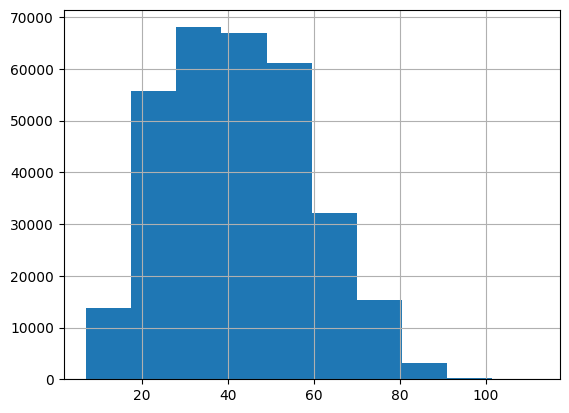

In [7]:
data_not_null_age = data[(data.Age > 0)]
data_not_null_age.Age.hist()

In [8]:
data_not_null_age.Signed_In.unique()

array([1])

In [9]:
def group_by_age(age):
    match age:
        case x if x < 18:
            return "0-18"
        case x if 18 <= x <= 24:
            return "18-24"
        case x if 25 <= x <= 34:
            return "25-34"
        case x if 35 <= x <= 44:
            return "35-44"
        case x if 45 <= x <= 54:
            return "45-54"
        case x if 55 <= x <= 64:
            return "55-64"
        case x if x >= 65:
            return "65+"


def check_gender(gender):
    if gender == 0:
        return "Female"
    else:
        return "Male"


group_data = data_not_null_age
group_data['AgeGroup'] = data_not_null_age.Age.apply(lambda row: group_by_age(row))
group_data = group_data.sort_values(by=['AgeGroup'])
group_data

/tmp/ipykernel_7255/3909912433.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['AgeGroup'] = data_not_null_age.Age.apply(lambda row: group_by_age(row))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
353212,17,1,6,0,1,0-18
331000,11,1,5,0,1,0-18
388083,16,1,4,0,1,0-18
424785,17,0,3,0,1,0-18
331018,17,0,6,0,1,0-18
...,...,...,...,...,...,...
409698,66,1,3,0,1,65+
409700,66,0,3,0,1,65+
339041,67,0,3,0,1,65+
201107,66,0,4,0,1,65+


<AxesSubplot: xlabel='AgeGroup', ylabel='Clicks'>

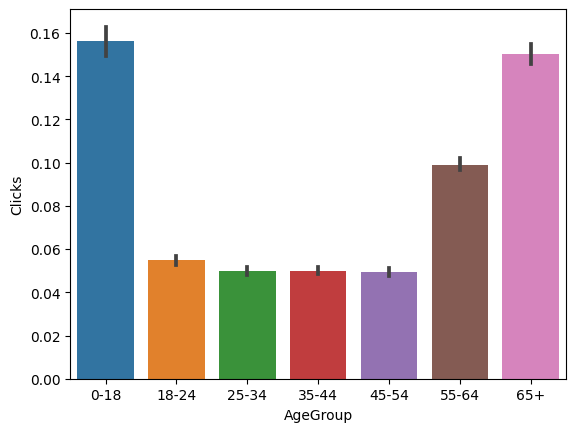

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=group_data, x=group_data.AgeGroup, y=group_data.Clicks)

<AxesSubplot: xlabel='AgeGroup', ylabel='Clicks'>

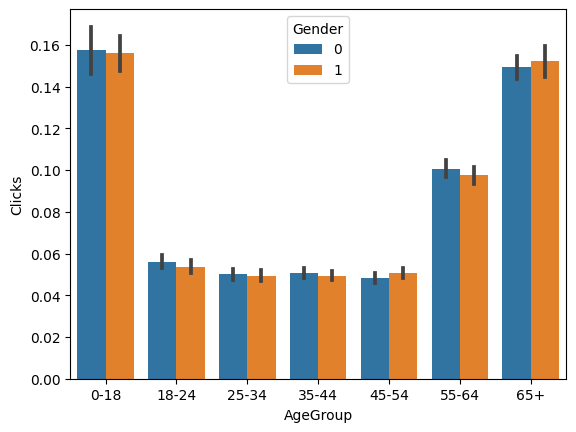

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=group_data,
                x=group_data.AgeGroup,
                y=group_data.Clicks,
                hue=group_data.Gender)

In [12]:
data_ctr = group_data.groupby('AgeGroup', as_index=False).sum()
data_ctr['CTR'] = data_ctr.Clicks / data_ctr.Impressions
data_ctr

,AgeGroup,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,0-18,210466,9299,69067,2160,13804,0.031274
1,18-24,831538,20360,198594,2184,39873,0.010997
2,25-34,1681115,29218,285134,2838,57018,0.009953
3,35-44,2737014,35353,345754,3468,69284,0.010030
4,45-54,3146478,32563,317236,3136,63543,0.009885
5,55-64,2652673,22676,223313,4415,44573,0.019770
6,65+,2098227,9948,143676,4318,28728,0.030054


<AxesSubplot: xlabel='AgeGroup', ylabel='CTR'>

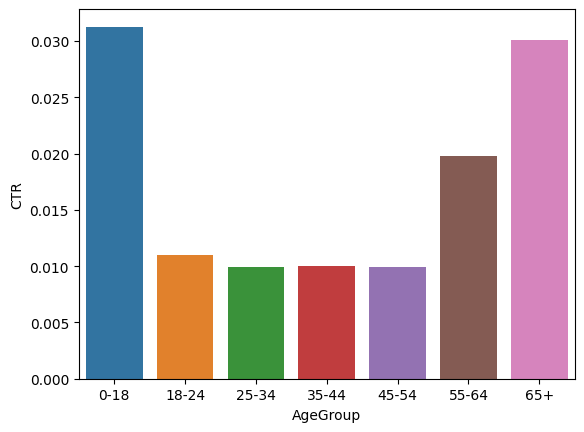

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_ctr,
                x=data_ctr.AgeGroup,
                y=data_ctr.CTR)

In [14]:
lab_data = group_data[group_data.Age > 18].drop(columns="Signed_In")
lab_data

,Age,Gender,Impressions,Clicks,AgeGroup
139740,22,0,3,0,18-24
93054,19,1,7,0,18-24
139846,24,1,4,0,18-24
373952,20,1,7,0,18-24
139850,20,1,5,0,18-24
...,...,...,...,...,...
409698,66,1,3,0,65+
409700,66,0,3,0,65+
339041,67,0,3,0,65+
201107,66,0,4,0,65+


In [15]:
lab_data["Gender"] = lab_data.Gender.apply(lambda row: check_gender(row))
lab_data['CTR'] = lab_data.Clicks / lab_data.Impressions
lab_data

,Age,Gender,Impressions,Clicks,AgeGroup,CTR
139740,22,Female,3,0,18-24,0.0
93054,19,Male,7,0,18-24,0.0
139846,24,Male,4,0,18-24,0.0
373952,20,Male,7,0,18-24,0.0
139850,20,Male,5,0,18-24,0.0
...,...,...,...,...,...,...
409698,66,Male,3,0,65+,0.0
409700,66,Female,3,0,65+,0.0
339041,67,Female,3,0,65+,0.0
201107,66,Female,4,0,65+,0.0


In [16]:
lab_data.groupby('AgeGroup').CTR.mean()

AgeGroup
18-24    0.009752
25-34    0.010077
35-44    0.010255
45-54    0.009860
55-64    0.019581
65+      0.030177
Name: CTR, dtype: float64

In [17]:
result_data = lab_data.groupby("AgeGroup").mean()
result_data = result_data.drop(columns="Age")
result_data.rename(columns={"Impressions": "Impressions mean", "Clicks": "Clicks mean"}, inplace=True)
result_data

/tmp/ipykernel_7255/2961734549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_data = lab_data.groupby("AgeGroup").mean()


,Impressions mean,Clicks mean,CTR
AgeGroup,,,
18-24,4.984821,0.048907,0.009752
25-34,5.000772,0.049774,0.010077
35-44,4.990387,0.050055,0.010255
45-54,4.992462,0.049352,0.009860
55-64,5.010051,0.099051,0.019581
65+,5.001253,0.150306,0.030177


<AxesSubplot: xlabel='AgeGroup'>

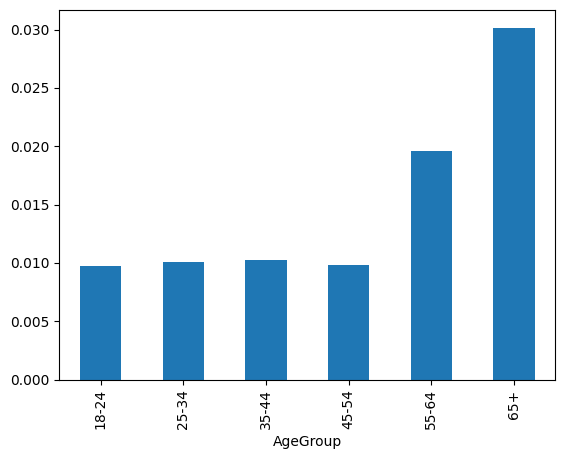

In [18]:
result_data.CTR.plot(kind="bar")

<AxesSubplot: xlabel='AgeGroup'>

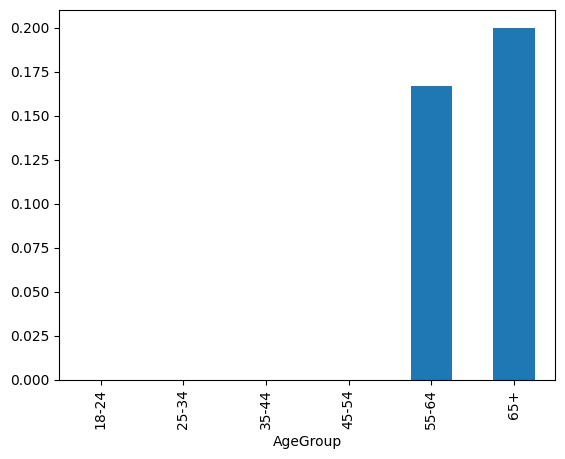

In [19]:
result_data["CTRQuantile"] = lab_data.groupby("AgeGroup").CTR.quantile(q=0.95)
result_data.CTRQuantile.plot(kind="bar")

<AxesSubplot: xlabel='AgeGroup'>

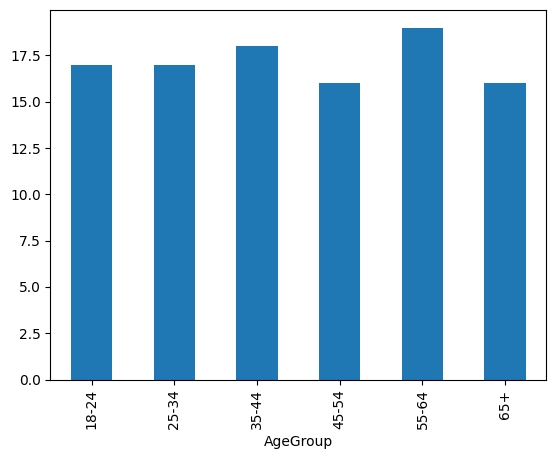

In [20]:
result_data["MaxImpressions"] = lab_data.groupby("AgeGroup").Impressions.max()
result_data["MaxImpressions"].plot(kind="bar")

<AxesSubplot: xlabel='AgeGroup'>

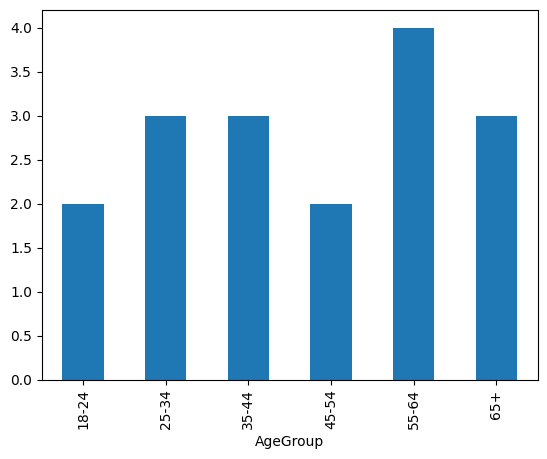

In [21]:
result_data["MaxClicks"] = lab_data.groupby("AgeGroup").Clicks.max()
result_data["MaxClicks"].plot(kind="bar")

<AxesSubplot: xlabel='AgeGroup'>

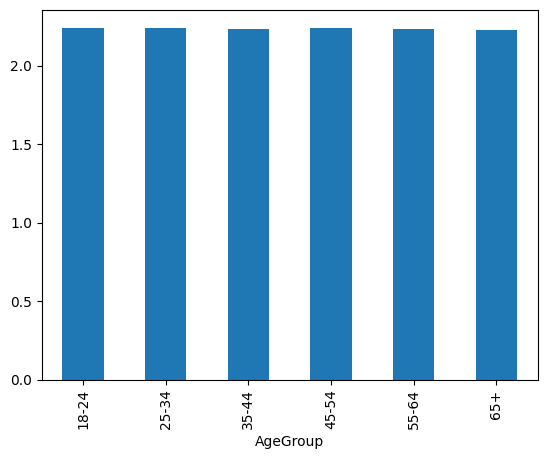

In [22]:
result_data["ImpressionsDispersion"] = lab_data.groupby("AgeGroup").Impressions.std()
result_data["ImpressionsDispersion"].plot(kind="bar")

<AxesSubplot: xlabel='AgeGroup'>

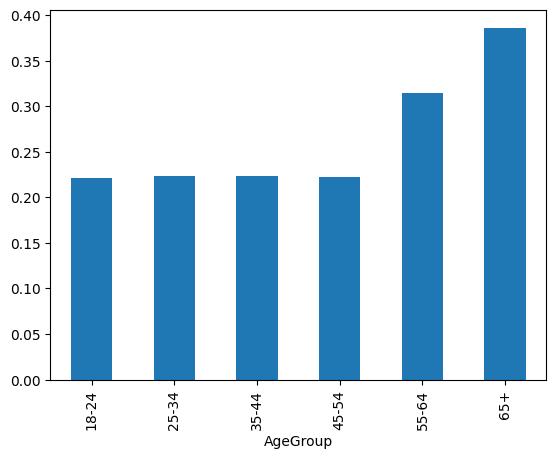

In [23]:
result_data["ClicksDispersion"] = lab_data.groupby("AgeGroup").Clicks.std()
result_data["ClicksDispersion"].plot(kind="bar")

In [24]:
def analyze_day(day):
    data_day = pd.read_csv(f"./data/nyt{day}.csv")
    data_day_no_null_age = data_day[(data_day.Age > 0) & (data_day.Signed_In == 1)]
    grouped_age_data = data_day_no_null_age
    grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: group_by_age(x))

    lab_data_day = grouped_age_data[grouped_age_data.Age > 18]
    lab_data_day = lab_data_day.drop(columns="Signed_In")
    lab_data_day["Gender"] = lab_data_day.Gender.apply(lambda x: check_gender(x))
    lab_data_day["CTR"] = lab_data_day.Clicks / lab_data_day.Impressions

    result_data_day = lab_data_day.groupby("age_group").mean()
    result_data_day = result_data_day.drop(columns="Age")
    result_data_day.rename(columns={"Impressions": "Impressions mean", "Clicks": "Clicks mean"}, inplace=True)
    result_data_day["CTR quantile"] = lab_data_day.groupby("age_group").CTR.quantile(q=0.95)
    result_data_day["Impressions max"] = lab_data_day.groupby("age_group").Impressions.max()
    result_data_day["Clicks max"] = lab_data_day.groupby("age_group").Clicks.max()
    result_data_day["Impressions dispersion"] = lab_data_day.groupby("age_group").Impressions.std()
    result_data_day["Clicks dispersion"] = lab_data_day.groupby("age_group").Clicks.std()

    return result_data_day

In [25]:
analyze_day(2)

/tmp/ipykernel_7255/971893923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: group_by_age(x))
/tmp/ipykernel_7255/971893923.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_data_day = lab_data_day.groupby("age_group").mean()


,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.986214,0.051783,0.010309,0.090909,16,3,2.248052,0.227396
25-34,5.007083,0.050230,0.010153,0.000000,18,3,2.235247,0.223983
35-44,4.987068,0.051019,0.010196,0.072802,16,3,2.226515,0.225955
45-54,4.994392,0.051227,0.010316,0.076923,17,3,2.228464,0.227166
55-64,5.020435,0.101605,0.020152,0.166667,16,3,2.240195,0.318949
65+,4.996207,0.146399,0.029019,0.200000,17,3,2.225281,0.383437


In [26]:
analyze_day(3)

/tmp/ipykernel_7255/971893923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: group_by_age(x))
/tmp/ipykernel_7255/971893923.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_data_day = lab_data_day.groupby("age_group").mean()


,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.996505,0.050703,0.010121,0.000000,18,2,2.227506,0.226175
25-34,4.996425,0.049663,0.009916,0.000000,17,3,2.229427,0.224374
35-44,5.008378,0.050715,0.010311,0.000000,19,3,2.238517,0.225372
45-54,4.984925,0.048965,0.009949,0.000000,16,3,2.225881,0.221717
55-64,5.002101,0.099940,0.020073,0.166667,16,3,2.232905,0.314726
65+,4.986910,0.151563,0.030305,0.200000,16,4,2.236634,0.389456


In [27]:
analyze_day(4)

/tmp/ipykernel_7255/971893923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: group_by_age(x))
/tmp/ipykernel_7255/971893923.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_data_day = lab_data_day.groupby("age_group").mean()


,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.998862,0.049008,0.009717,0.000000,16,3,2.251371,0.221623
25-34,4.994947,0.050135,0.010148,0.000000,17,3,2.240874,0.223034
35-44,4.997100,0.050827,0.010060,0.000000,17,3,2.232983,0.225663
45-54,4.987168,0.051295,0.010065,0.083333,17,3,2.233218,0.226401
55-64,5.007956,0.100752,0.020192,0.166667,17,3,2.233261,0.317994
65+,5.029751,0.149906,0.029551,0.200000,16,3,2.234815,0.387375


/tmp/ipykernel_7255/971893923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: group_by_age(x))
/tmp/ipykernel_7255/971893923.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_data_day = lab_data_day.groupby("age_group").mean()


<AxesSubplot: xlabel='age_group'>

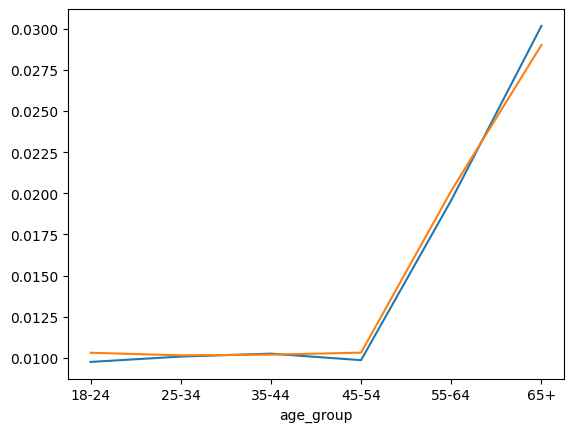

In [28]:
ax = result_data.CTR.plot()
analyze_day(2).CTR.plot(ax=ax)